# LA Clippers and Crime
## The effect a LA Clippers win/lose streak has on Crime in Los Angeles

### Contents
- Data Preparation
- LA Clippers results
- Crime in Los Angeles
- LA Clippers Form
- LA Clippers Streaks

In [50]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [51]:
if not os.path.exists( "../../data/prep/600_NBA.csv" ):
    print("Missing dataset file")

In [52]:
nba = pd.read_csv("../../data/prep/600_NBA.csv", index_col="Date", parse_dates=True)
nba.shape

(5354, 8)

Sorting the dates of the games...

In [53]:
nba.sort_index(ascending=True)

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9
2007-10-31,7:00 pm,Philadelphia 76ers,97,Toronto Raptors,106,19800.0,Home Win,-9
2007-11-02,8:00 pm,Washington Wizards,83,Boston Celtics,103,18624.0,Home Win,-20
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21


# LA Clippers

We'll look at the LA Clippers...

In [54]:
la = nba[(nba.values  == "Los Angeles Clippers")]

In [55]:
la.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6
2007-11-04,12:30 pm,Seattle SuperSonics,101,Los Angeles Clippers,115,17376.0,Home Win,-14
2007-11-06,7:30 pm,Los Angeles Clippers,97,Chicago Bulls,91,21742.0,Away Win,6
2007-11-07,7:00 pm,Los Angeles Clippers,104,Indiana Pacers,89,10122.0,Away Win,15
2007-11-09,8:00 pm,Los Angeles Clippers,79,Detroit Pistons,103,22076.0,Home Win,-24


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [56]:
laHome = la[la['Home/Neutral'] == 'Los Angeles Clippers']

In [57]:
conditions = [
    (laHome['PTS.1'] > laHome['PTS']),
    (laHome['PTS'] == laHome['PTS.1'])]
choices = [1, 0]
laHome['LA Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [58]:
laHome.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6,1
2007-11-04,12:30 pm,Seattle SuperSonics,101,Los Angeles Clippers,115,17376.0,Home Win,-14,1
2007-11-11,6:30 pm,Cleveland Cavaliers,103,Los Angeles Clippers,95,15541.0,Away Win,8,-1
2007-11-14,7:30 pm,New York Knicks,81,Los Angeles Clippers,84,15296.0,Home Win,-3,1
2007-11-17,7:30 pm,Chicago Bulls,92,Los Angeles Clippers,73,17535.0,Away Win,19,-1


and now their away games...

In [59]:
laAway = la[la['Visitor/Neutral'] == 'Los Angeles Clippers']

In [60]:
conditions = [
    (laAway['PTS'] > laAway['PTS.1']),
    (laAway['PTS'] == laAway['PTS.1'])]
choices = [1, 0]
laAway['LA Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [61]:
laAway.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2007-11-06,7:30 pm,Los Angeles Clippers,97,Chicago Bulls,91,21742.0,Away Win,6,1
2007-11-07,7:00 pm,Los Angeles Clippers,104,Indiana Pacers,89,10122.0,Away Win,15,1
2007-11-09,8:00 pm,Los Angeles Clippers,79,Detroit Pistons,103,22076.0,Home Win,-24,-1
2007-11-16,7:30 pm,Los Angeles Clippers,105,Golden State Warriors,122,19596.0,Home Win,-17,-1
2007-11-23,7:00 pm,Los Angeles Clippers,94,Phoenix Suns,113,18422.0,Home Win,-19,-1


We'll combine the 2 dataframes

In [62]:
fram1 = [laHome, laAway]
laRes = pd.concat(fram1, axis = 0)

In [63]:
laRes.tail()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2017-03-30,10:00 pm,Los Angeles Clippers,124,Phoenix Suns,118,16736.0,Away Win,6,1
2017-04-08,8:30 pm,Los Angeles Clippers,98,San Antonio Spurs,87,18420.0,Away Win,11,1
2017-04-21,10:00 pm,Los Angeles Clippers,111,Utah Jazz,106,19911.0,Away Win,5,1
2017-04-23,9:00 pm,Los Angeles Clippers,98,Utah Jazz,105,19911.0,Home Win,-7,-1
2017-04-28,10:30 pm,Los Angeles Clippers,98,Utah Jazz,93,19911.0,Away Win,5,1


The index is sorted again

In [64]:
laRes = laRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

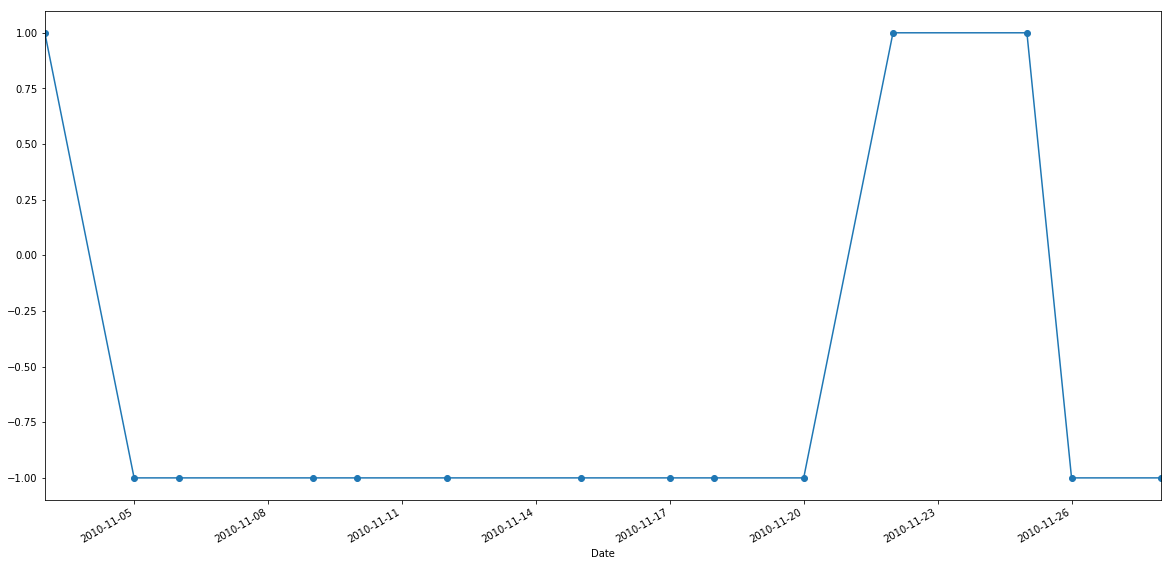

In [65]:
ctest2 = laRes.loc['2010-11-02':'2010-11-30']
ctest2['LA Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [66]:
ctest3 = laRes.loc['2009-11-02':'2010-06-30']
ctest3

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2009-11-02,7:30 pm,Minnesota Timberwolves,90,Los Angeles Clippers,93,13614.0,Home Win,-3,1
2009-11-06,7:30 pm,Los Angeles Clippers,118,Golden State Warriors,90,18788.0,Away Win,28,1
2009-11-07,7:30 pm,Memphis Grizzlies,110,Los Angeles Clippers,113,15399.0,Home Win,-3,1
2009-11-09,7:30 pm,New Orleans Hornets,112,Los Angeles Clippers,84,14760.0,Away Win,28,-1
2009-11-11,7:30 pm,Oklahoma City Thunder,83,Los Angeles Clippers,79,14248.0,Away Win,4,-1
2009-11-13,7:30 pm,Toronto Raptors,104,Los Angeles Clippers,89,15615.0,Away Win,15,-1
2009-11-15,6:00 pm,Los Angeles Clippers,101,Oklahoma City Thunder,93,17715.0,Away Win,8,1
2009-11-17,7:00 pm,Los Angeles Clippers,102,New Orleans Hornets,110,13116.0,Home Win,-8,-1
2009-11-18,7:00 pm,Los Angeles Clippers,91,Memphis Grizzlies,106,10012.0,Home Win,-15,-1


The unnecessary columns are now dropped...

In [67]:
laRes= laRes.drop('Visitor/Neutral', 1)
laRes= laRes.drop('PTS', 1)
laRes= laRes.drop('Home/Neutral', 1)
laRes= laRes.drop('Attend.', 1)
laRes= laRes.drop('PTS.1', 1)
laRes= laRes.drop('Result', 1)
laRes= laRes.drop('Difference', 1)

In [68]:
start_remove = pd.to_datetime('2015-12-31')
end_remove = pd.to_datetime('2010-01-01')

In [69]:
laRes = laRes.loc[(laRes.index < start_remove) & (laRes.index > end_remove)]

In [70]:
laRes.head()

,Start (ET),LA Res
Date,,
2010-01-04,7:30 pm,1
2010-01-06,7:30 pm,1
2010-01-10,12:30 pm,1
2010-01-12,7:00 pm,-1
2010-01-13,7:00 pm,-1


# LA Crime

We now load in the LA crime dataset...

In [71]:
lacrime = pd.read_csv( "../../data/prep/200_LA.csv", index_col="Date", parse_dates=True)

In [72]:
lacrime.head()

,Primary Type,Premise Description,Location
Date,,,
2013-01-31 21:50:00,Vandalism,"VEHICLE, PASSENGER/TRUCK","(34.0688, -118.2394)"
2013-02-16 21:40:00,Vandalism,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0433, -118.2504)"
2013-03-19 21:30:00,Vandalism,POLICE FACILITY,"(34.0446, -118.245)"
2013-05-27 22:20:00,Vandalism,"VEHICLE, PASSENGER/TRUCK","(34.0419, -118.2485)"
2013-06-01 23:00:00,Vandalism,OTHER RESIDENCE,"(34.0445, -118.2523)"


<function matplotlib.pyplot.show>

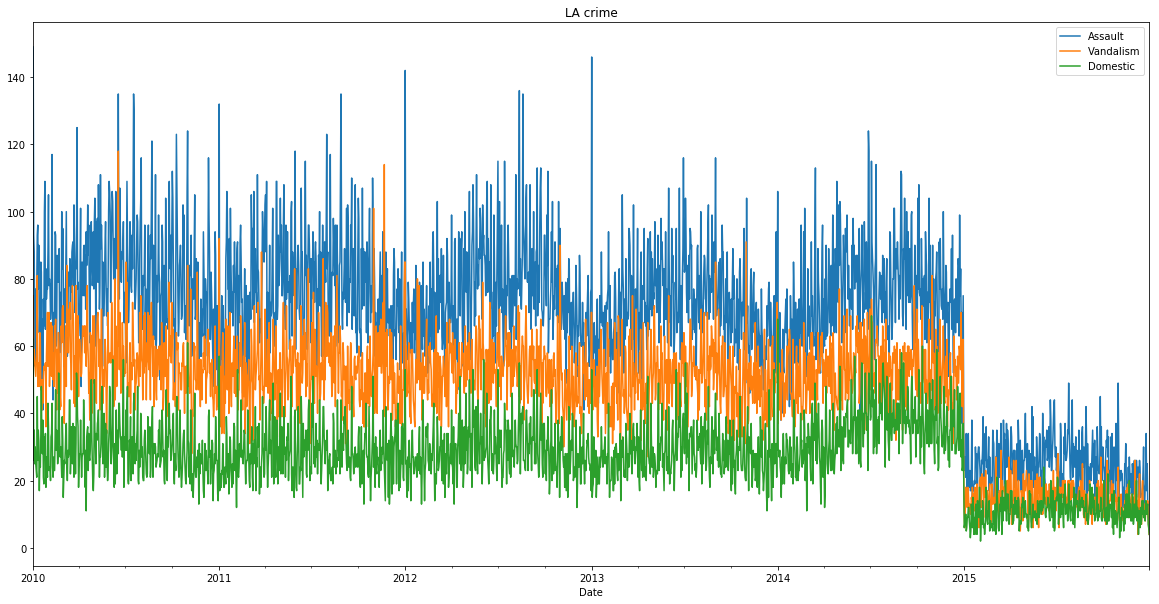

In [73]:
plt.subplot()

a1p = lacrime[lacrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = lacrime[lacrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = lacrime[lacrime['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('LA crime')

plt.show

<function matplotlib.pyplot.show>

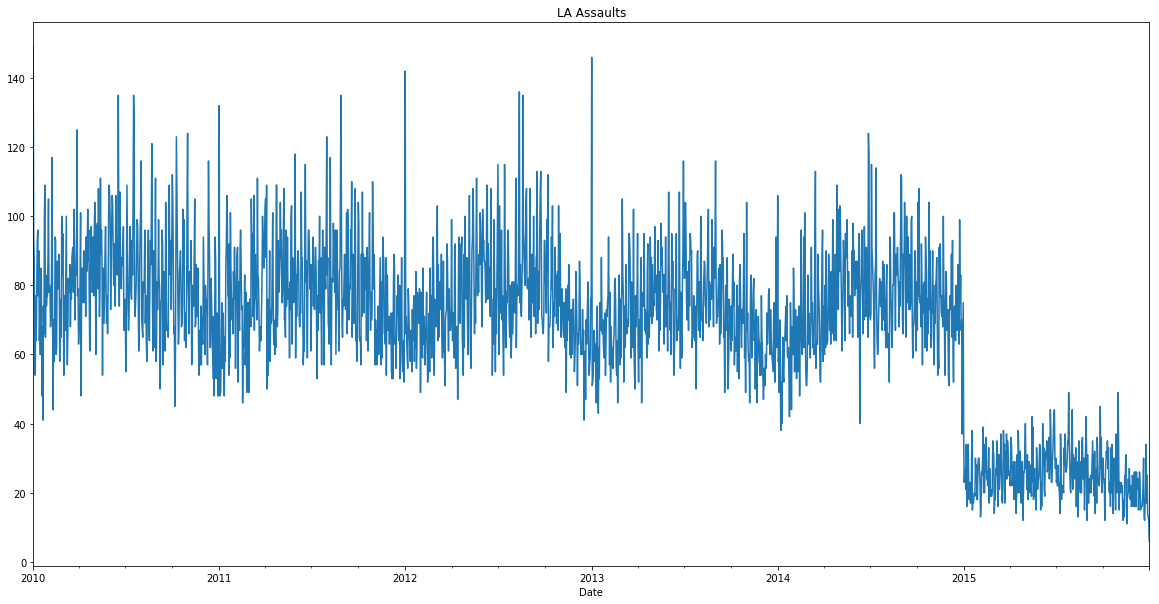

In [74]:
plt.subplot()

a1p = lacrime[lacrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('LA Assaults')

plt.show

<function matplotlib.pyplot.show>

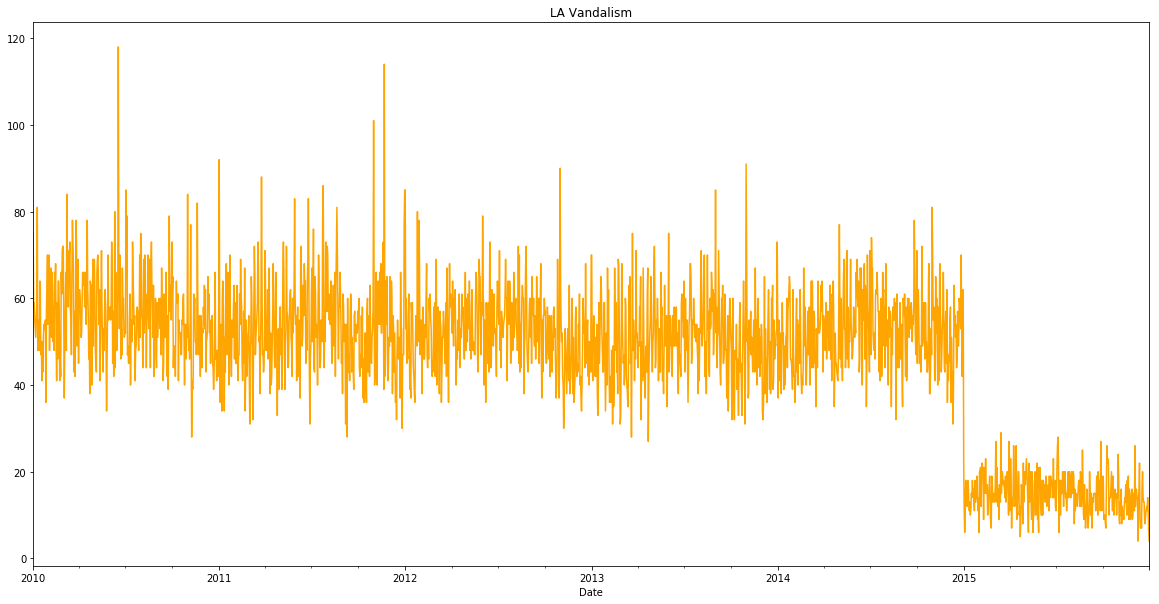

In [75]:
plt.subplot()


v1p = lacrime[lacrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('LA Vandalism')

plt.show

<function matplotlib.pyplot.show>

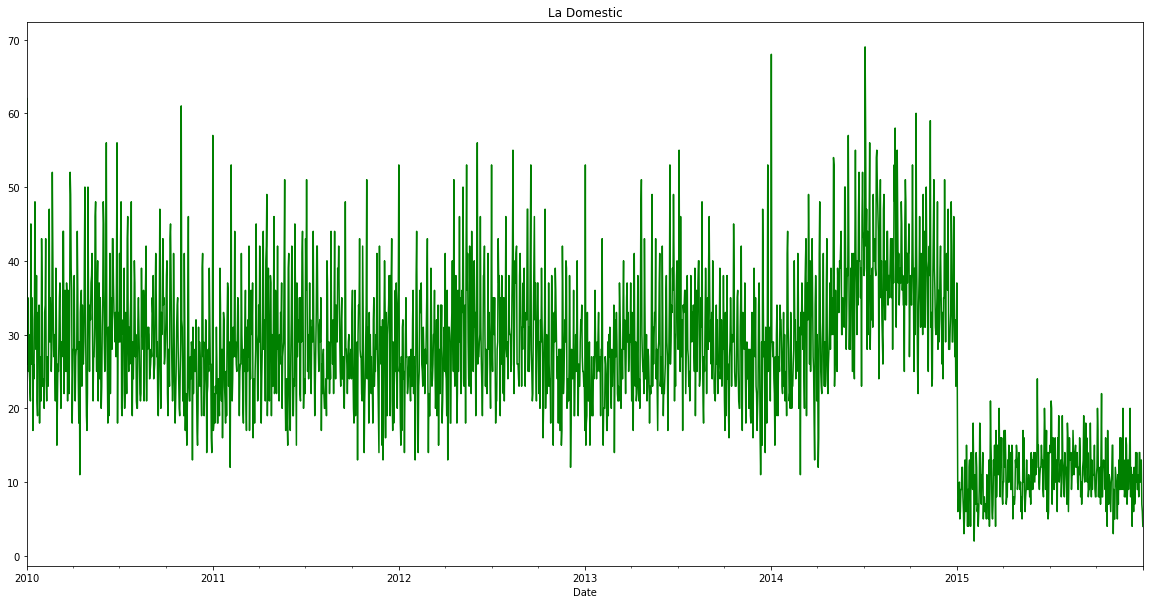

In [76]:
plt.subplot()

a1p = lacrime[lacrime['Primary Type'] == "Domestic"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('La Domestic')

plt.show

# Crime vs Results

A day by day comparison of domestic violence and the games..

<function matplotlib.pyplot.show>

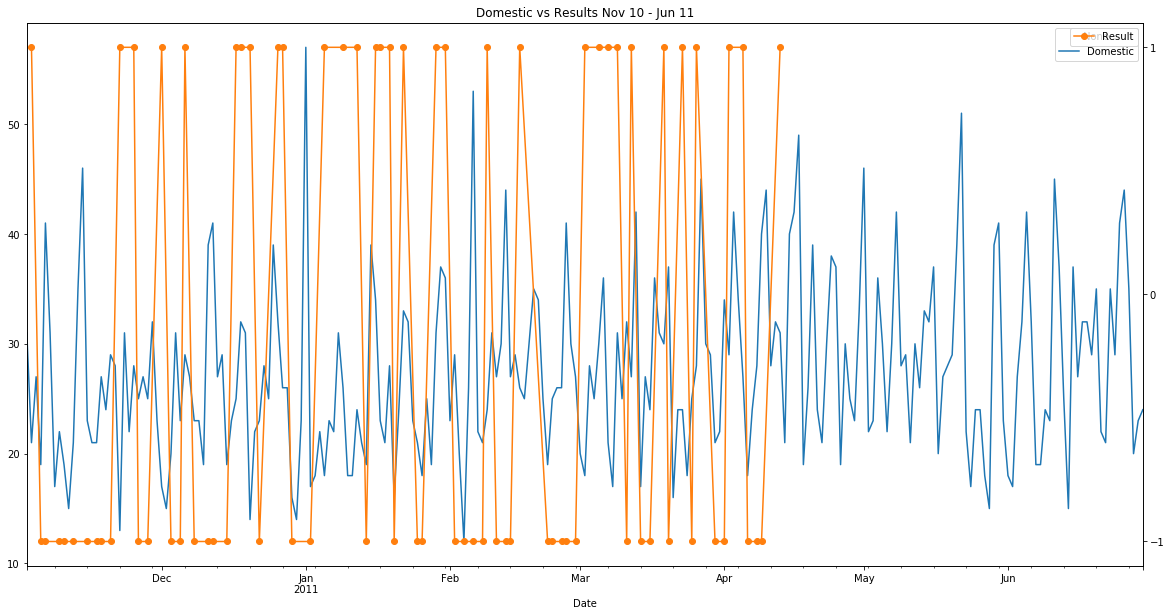

In [77]:

c1 = lacrime.loc['2010-11-02':'2011-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Domestic vs Results Nov 10 - Jun 11')
plt.legend(['Domestic'])

ctest5 = laRes.loc['2010-11-02':'2011-06-30']
ctest5['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

All seasons from 2010 to 2015

<function matplotlib.pyplot.show>

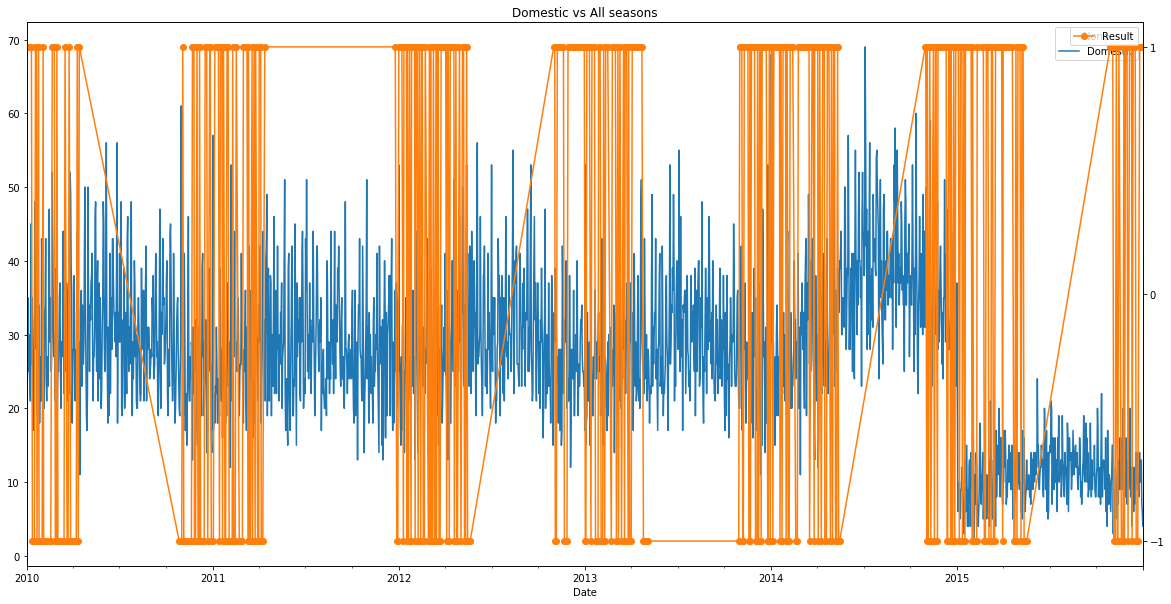

In [78]:
c1 = lacrime.loc['2007-11-02':'2017-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Domestic vs All seasons')
plt.legend(['Domestic'])

ctest7 = laRes.loc['2009-11-02':'2016-01-01']
ctest7['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

The 11/12 season was shorter

<function matplotlib.pyplot.show>

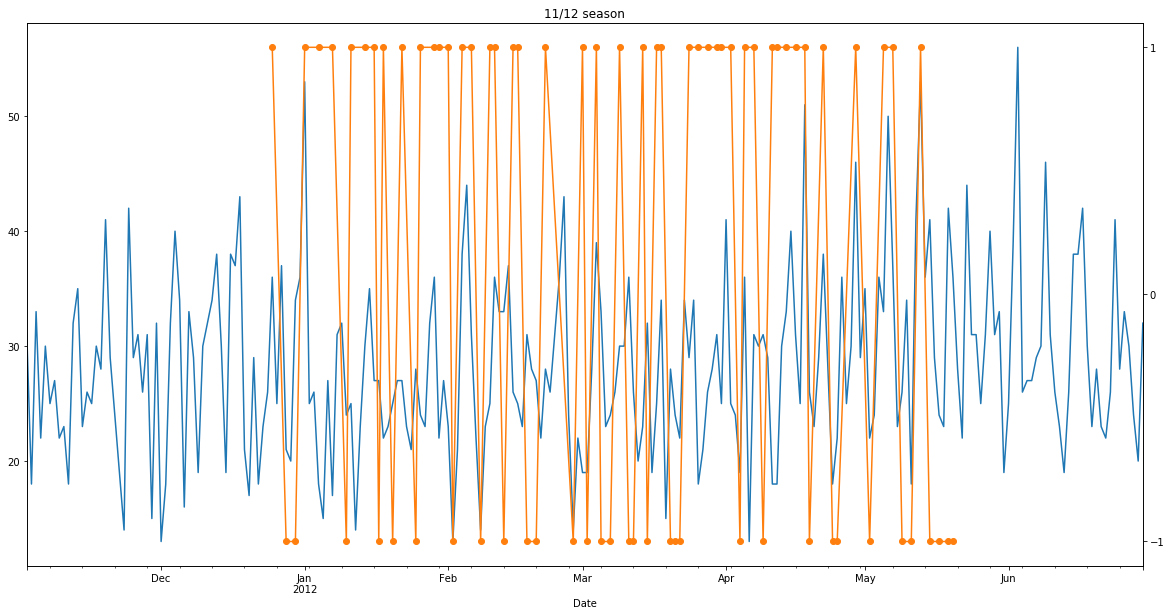

In [79]:
c1 = lacrime.loc['2011-11-02':'2012-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('11/12 season')

ctest8 = laRes.loc['2011-11-02':'2012-06-30']
ctest8['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

# LA Clippers Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was in March 2010 with a value of -14. The highest was in Januray 2013 with a sum of 18.  

In [80]:
chMonthly = laRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['LA Res'])
chMonthly.sort_values(by=['LA Res'])

,LA Res
Date,
2010-03-31,-14.0
2010-11-30,-12.0
2011-03-31,-8.0
2010-01-31,-3.0
2010-05-31,-3.0
2011-05-31,-1.0
2014-05-31,0.0
2012-05-31,1.0
2015-11-30,2.0


Showing the best form with all three crimes...

<function matplotlib.pyplot.show>

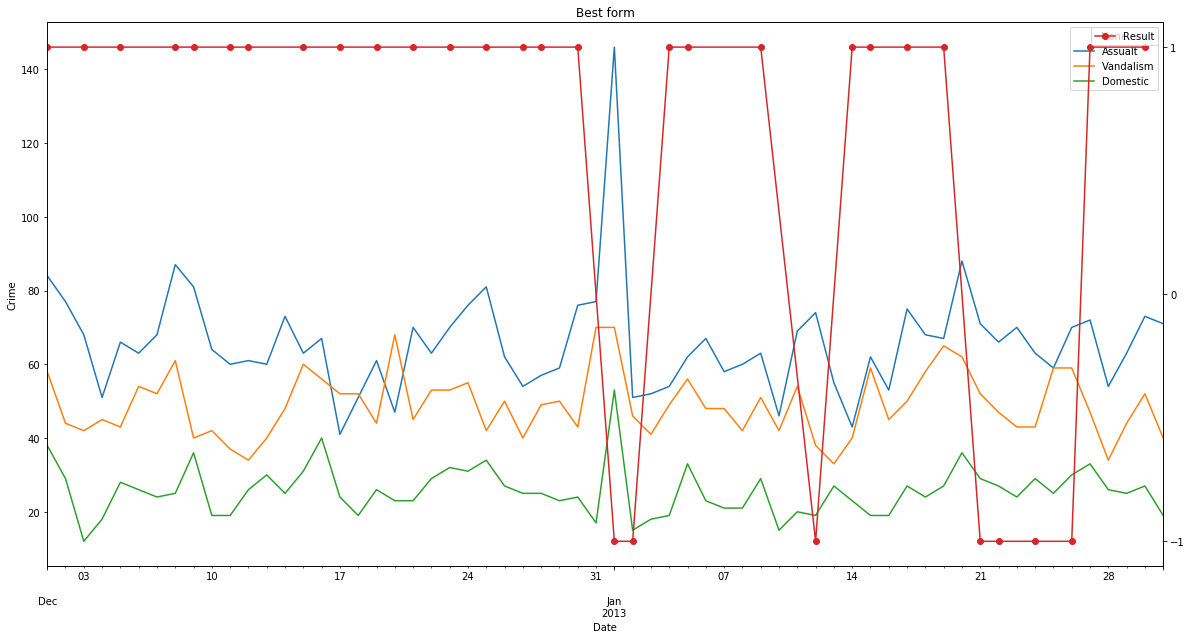

In [81]:


c = lacrime.loc['2012-12-01':'2013-01-31']
a1 = c[c['Primary Type'] == "Assault"]['Primary Type']
a1.resample('D').count().plot()

v1 = c[c['Primary Type'] == "Vandalism"]['Primary Type']
v1.resample('D').count().plot()

d1 = c[c['Primary Type'] == "Domestic"]['Primary Type']
d1.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'], loc = 4)
pylab.ylabel('Crime')
plt.title('Best form')

ct = laRes.loc['2012-12-01':'2013-01-31']
ct['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))


plt.legend(["Result"])
plt.show

All three crimes show a small reduction in crime in this period. Notice the huge rise in Assault and domestic the day the streak was broken. There is also another rise when the 3 game streak is broken again. 

Looking at the Clipper's worst run of form...

<function matplotlib.pyplot.show>

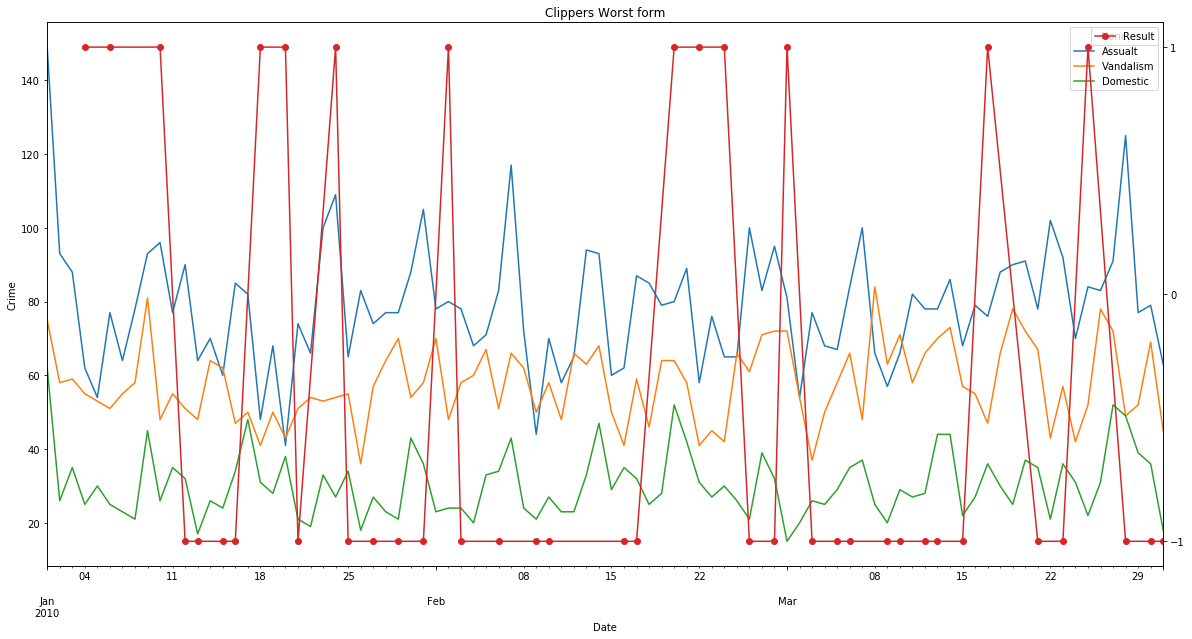

In [82]:
plt.subplot()

cp = lacrime.loc['2010-01-01':'2010-03-31']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Clippers Worst form')

ctp = laRes.loc['2010-01-01':'2010-03-31']
ctp['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

There are a lot of significant spikes when games are lost, however some can also be seen when games are won.  

# LA Clippers Win/Lose Streaks

A function to create streak columns

In [83]:
def streaks(laRes, col):
    sign = np.sign(laRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return laRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the laRes dataframe..

In [84]:
laRes = streaks(laRes, 'LA Res')

In [85]:
laRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2010-01-04 to 2015-12-30
Data columns (total 4 columns):
Start (ET)     521 non-null object
LA Res         521 non-null int32
lose_streak    521 non-null float64
win_streak     521 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 18.3+ KB


Sorting the dataframe by the losing streak column..

In [86]:
laRes.sort_values(by=['lose_streak'], ascending= False).head()

,Start (ET),LA Res,lose_streak,win_streak
Date,,,,
2010-11-20,7:30 pm,-1,9.0,0.0
2010-11-18,7:00 pm,-1,8.0,0.0
2010-03-15,7:30 pm,-1,8.0,0.0
2010-11-17,7:00 pm,-1,7.0,0.0
2010-03-13,7:30 pm,-1,7.0,0.0


Analysing the period where the worst losing streak occurred...

<function matplotlib.pyplot.show>

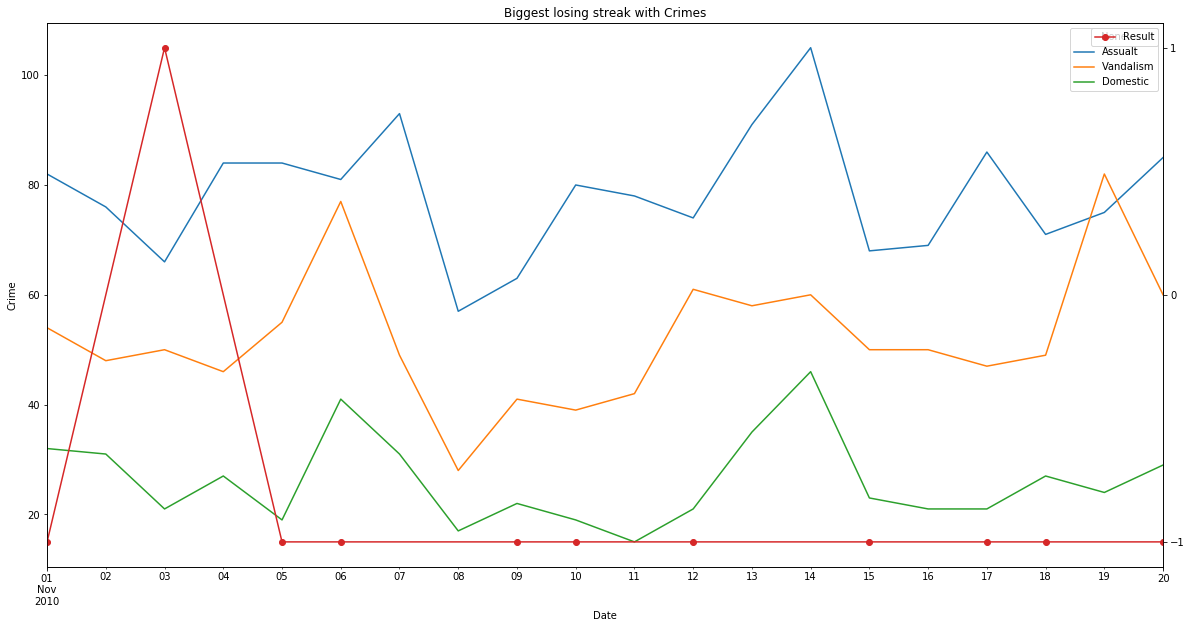

In [87]:
plt.subplot()

cp = lacrime.loc['2010-11-01':'2010-11-20']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Biggest losing streak with Crimes')

ctp = laRes.loc['2010-11-01':'2010-11-20']
ctp['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Longest Losing Streak with Crimes')

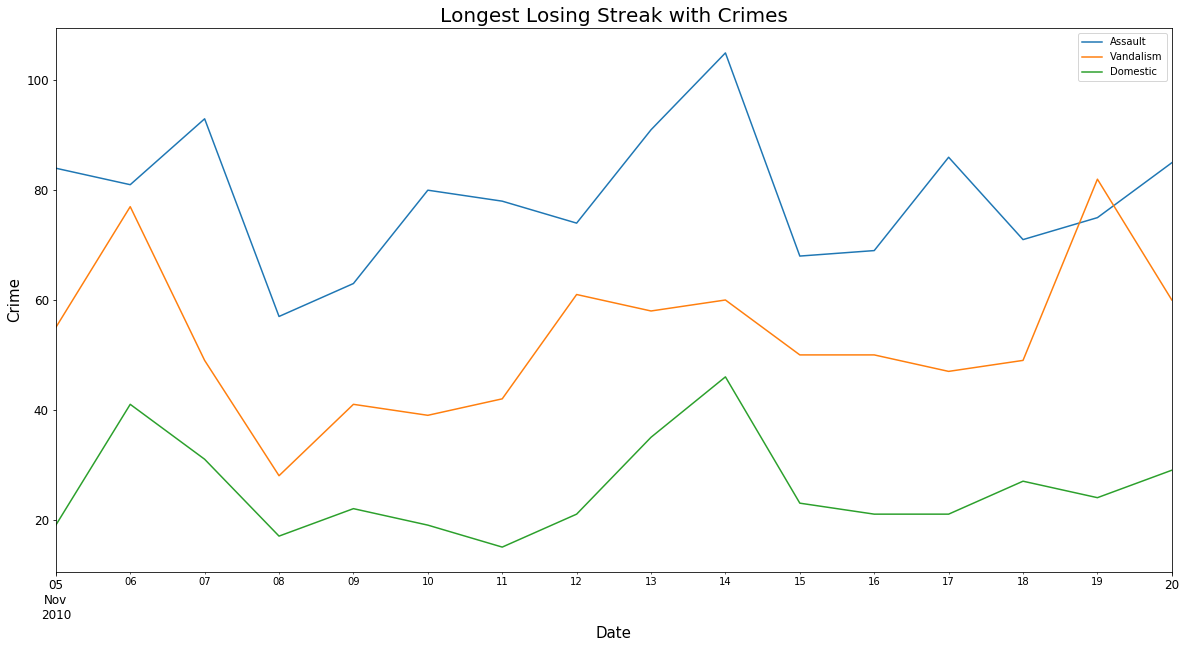

In [88]:
plt.subplot()

cp = lacrime.loc['2010-11-05':'2010-11-20']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Longest Losing Streak with Crimes', fontsize = 20)

All three see a rise in crime during the worst streak. The peak of Assault and Domestic occur when there is no game on. The second day of the win streak sees a rise in both vandalism and domestic but not assault. 

Sorting the dataframe by the win streak column

In [89]:
laRes.sort_values(laRes.columns[3], ascending = False).head()

,Start (ET),LA Res,lose_streak,win_streak
Date,,,,
2012-12-30,6:30 pm,1,0.0,17.0
2012-12-28,7:00 pm,1,0.0,16.0
2012-12-27,7:30 pm,1,0.0,15.0
2012-12-25,7:30 pm,1,0.0,14.0
2012-12-23,6:00 pm,1,0.0,13.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

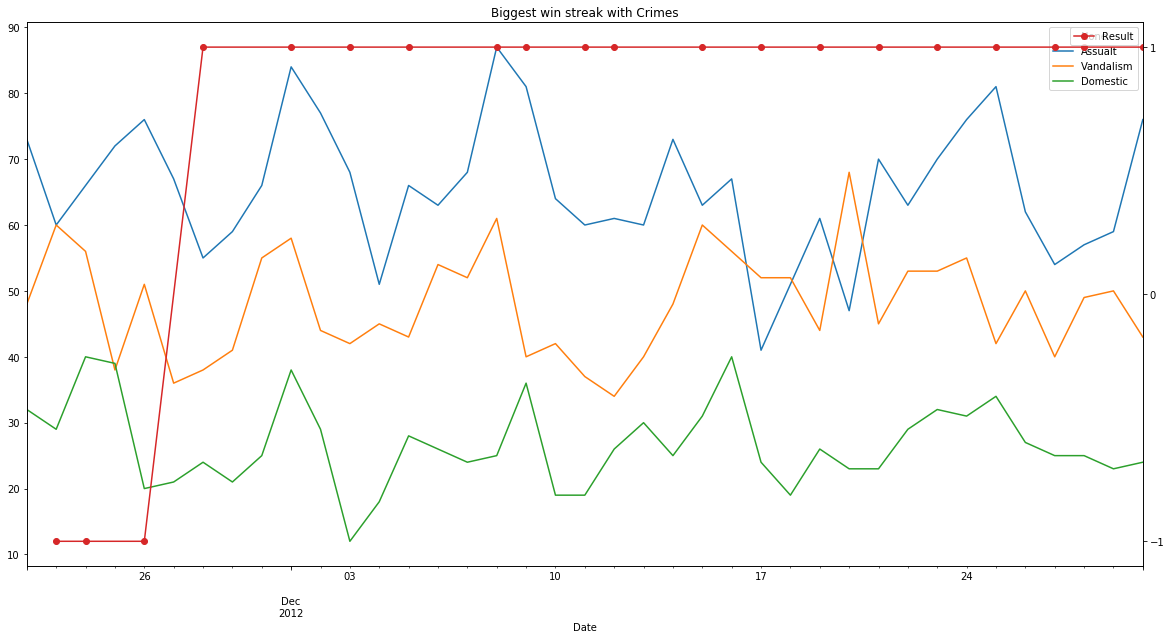

In [90]:
plt.subplot()

cp = lacrime.loc['2012-11-22':'2012-12-30']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Biggest win streak with Crimes')

ctp = laRes.loc['2012-11-22':'2012-12-30']
ctp['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Longest Winning Streak with Crimes')

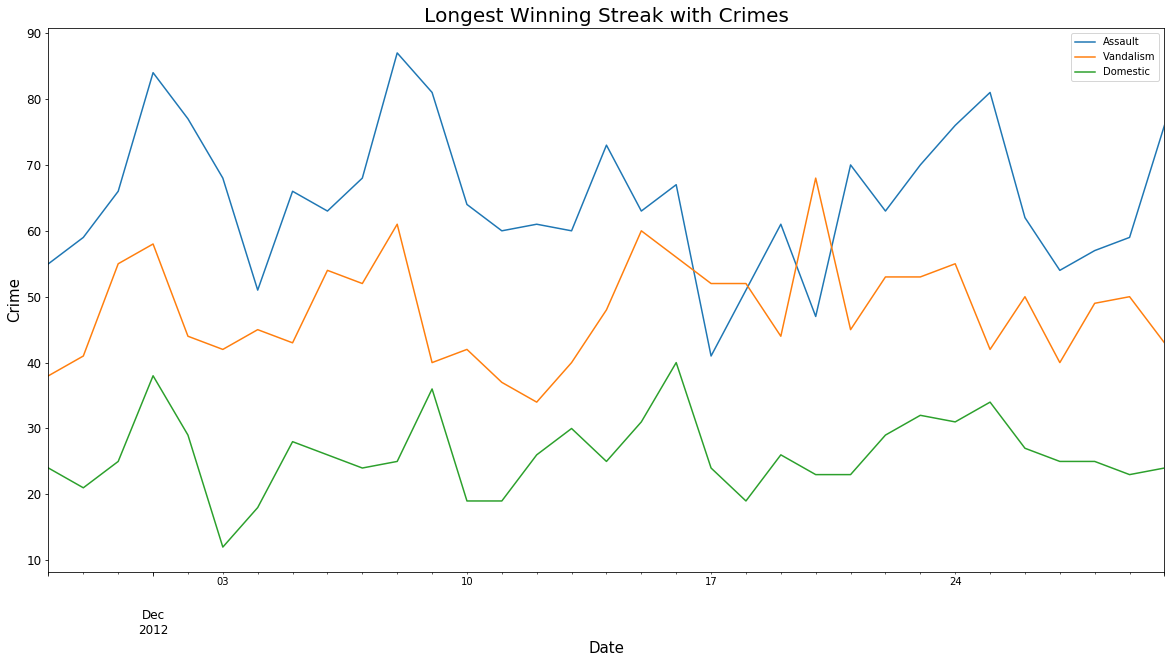

In [91]:
plt.subplot()

cp = lacrime.loc['2012-11-28':'2012-12-30']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Longest Winning Streak with Crimes', fontsize = 20)

Assault drops significantly in the middle of the streak but then rises again. Domestic violence mellows throughout while vandalism also drops on the 8 game of the win streak

### Comparing Longest Streaks

In [92]:
cp = lacrime.loc['2010-11-05':'2010-11-20']

print('Daily average for Losing Streak:')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = lacrime.loc['2012-11-28':'2012-12-30']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 78.75
Vandalism = 53.0
Domestic = 25.6875
 
Daily average for Winning Streak:
Assault = 64.87878787878788
Vandalism = 48.06060606060606
Domestic = 26.09090909090909


There is a drop in both assault and vandalism from the losing streak to the winning streak. There is a gradual rise in domestic violence surprising. Again, these streaks both came in the Winter period and are only 2 years apart so timing wouldn't be a confounding factor. The vast gap in daily numbers during these streaks could be due to the frustration from the fans..

### Comparing with periods before streaks

In [93]:
cp = lacrime.loc['2012-10-26':'2012-11-28']

print('Period before Winning Streak')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = lacrime.loc['2012-11-28':'2012-12-30']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winning Streak
Assault = 72.05882352941177
Vandalism = 48.64705882352941
Domestic = 27.764705882352942
 
Period of Winning Streak:
Assault = 64.87878787878788
Vandalism = 48.06060606060606
Domestic = 26.09090909090909


In [94]:
cp = lacrime.loc['2010-10-20':'2010-11-05']

print('Period before Losing Streak')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Losing Streak:')

cp0 = lacrime.loc['2010-11-05':'2010-11-20']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Losing Streak
Assault = 82.0
Vandalism = 53.76470588235294
Domestic = 28.352941176470587
 
Period of Losing Streak:
Assault = 78.75
Vandalism = 53.0
Domestic = 25.6875


The losing streak does not have a negative effect on crime in this period. 